# Compartment-based diffusion
Based on **A practical guide to stochastic simulations of reaction-diffusion processes** by Erdman et al. (2007) https://arxiv.org/abs/0704.1908.

Simulate time evolution of many compartments instead of computing individual trajectories of the molecules. Molecule $A$ moves from compartment $i$ to $i+1$ in the reaction scheme below, where each 'reaction' has a diffusion coefficient of $d$.

\begin{equation}
A_1 \leftrightarrow A_2 \leftrightarrow A_3 \leftrightarrow ... \leftrightarrow A_K
\end{equation}

#### The SSA is described as:
1. Generate two random numbers $r_1$, $r_2$ uniformly distributed in $(0,1)$.
2. Compute propensity functions of reactions by $\alpha_i=dA_i(t)$ for $i=1,2,...,K$. Compute 
\begin{equation}
\alpha_o=\sum_{i=1}^{K-1}\alpha_i+\sum_{i=2}^{K}\alpha_i
\end{equation}
where the 1st term corresponds to the forward reactions and the second term refers to the backward reactions.
3. Compute the time at which the next chemical reaction takes place as $t + \tau$.
\begin{equation}
\tau=\frac{1}{\alpha_o}ln\frac{1}{r_1}
\end{equation}
4. If $r_2<\sum_{i=1}^{K-1}\alpha_i/\alpha_o$, then find $j$ $\epsilon$ {$1,2,3,...,K-1$} such that
\begin{equation}
r_2\geq\frac{1}{\alpha_o}\sum_{i=1}^{j-1}\alpha_i \text{ and }
r_2<\frac{1}{\alpha_o}\sum_{i=1}^{j}\alpha_i
\end{equation}
Then compute the number of molecules at time $t+\tau$ by
\begin{equation}
A_j(t+\tau)=A_j(t)-1
\end{equation}
\begin{equation}
A_{j+1}(t+\tau)=A_{j+1}(t)+1
\end{equation}
\begin{equation}
A_i(t+\tau)=A_i(t) \text{ for } i\neq j\text{, }i\neq j+1
\end{equation}
5. If $r_2\geq\sum_{i=1}^{K-1}\alpha_i/\alpha_o$, then find $j$ $\epsilon$ {$2,3,...,K$} such that
\begin{equation}
r_2\geq\frac{1}{\alpha_o}\left(\sum_{i=1}^{K-1}\alpha_i+\sum_{i=2}^{j-1}\alpha_i\right)\text{ and }
r_2<\frac{1}{\alpha_o}\left(\sum_{i=1}^{K-1}\alpha_i+\sum_{i=2}^{j}\alpha_i\right)
\end{equation}
Then compute the number of molecules at time $t+\tau$ by
\begin{equation}
A_j(t+\tau)=A_j(t)-1
\end{equation}
\begin{equation}
A_{j-1}(t+\tau)=A_{j-1}(t)+1
\end{equation}
\begin{equation}
A_i(t+\tau)=A_i(t) \text{ for } i\neq j\text{, }i\neq j−1
\end{equation}
6. Repeat at $t + \tau$.

## 1D stochastic diffusion

In [1]:
#Import packages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Initialize 1D array.
size=20
A=np.zeros((1,size))
A[0][9]=500
A[0][10]=500
A[0][11]=500
#Time steps.
max_t=30
t=[0]

#Parameters (diffusion coefficient).
params=[0.5]

In [3]:
def propensity(A,params):
    #Forward reactions.
    props_f=np.sum(A[0][0:-1]*params[0])
    #Backward reactions.
    props_r=np.sum(A[0][1:]*params[0])
    #Sum.
    props_o=props_f+props_r
    return props_f,props_r,props_o
def find_j_1(A,params,props_o):
    for j in range(len(A[0])):
        j=j+1
        cond1=np.sum(A[0][0:j-1]*params[0])/props_o
        cond2=np.sum(A[0][0:j]*params[0])/props_o
        if r2>=cond1 and r2<cond2:
            break
    return j-1
def find_j_2(A,params,props_o,props_f):
    for j in range(len(A[0])):
        j=j+1
        cond1=(props_f+np.sum(A[0][1:j-1]*params[0]))/props_o
        cond2=(props_f+np.sum(A[0][1:j]*params[0]))/props_o
        if r2>=cond1 and r2<cond2:
            break
    return j-1

In [4]:
Af=[A]
while t[-1]<max_t:
    #Generate random numbers r1 and r2.
    r1=np.random.uniform(0,1)
    r2=np.random.uniform(0,1)
    #Compute propensity.
    props_f,props_r,props_o=propensity(A,params)
    #Determine time step.
    tau=1/props_o*np.log(1/r1)
    #Determine reactions and update variables.
    if r2<props_f/props_o:
        j=find_j_1(A,params,props_o)
        case=1
    else:
        j=find_j_2(A,params,props_o,props_f)
        case=-1
    A[0][j]=A[0][j]-1
    A[0][j+case]=A[0][j+case]+1
    #Update time.
    t.append(t[-1]+tau)
    Af=np.append(Af,[A],axis=1)

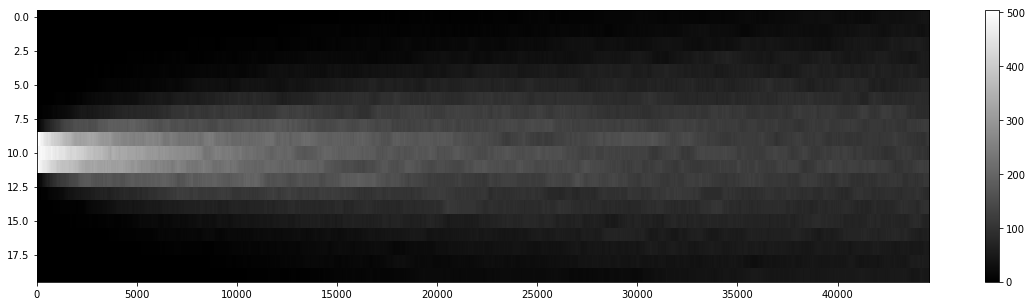

In [5]:
plt.figure(figsize=(20,5))
plt.imshow(np.transpose(Af[0]),cmap='gray',interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()